In [1]:
import pandas as pd

# 数据加载
dataset = pd.read_csv('./SupplyChain.csv',encoding='unicode_escape')
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [3]:
# 将12万用户 => 划分为8个层次（通过RFM方法）
dataset['Customer Id'].value_counts()

5654     47
5004     45
10591    45
5715     44
3708     44
         ..
13486     1
17887     1
15952     1
13905     1
14375     1
Name: Customer Id, Length: 20652, dtype: int64

In [5]:
# 180519笔订单，53个特征
dataset.shape
temp = dataset.isnull().sum()
temp[temp>0].index

Index(['Customer Lname', 'Customer Zipcode', 'Order Zipcode',
       'Product Description'],
      dtype='object')

In [7]:
# 对Customer Zipcode采用众数进行缺失值补全
dataset['Customer Zipcode'].value_counts()
dataset['Customer Zipcode'].fillna(dataset['Customer Zipcode'].mode()[0],inplace=True)

In [8]:
dataset['Customer Zipcode'].value_counts()

725.0      66773
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [13]:
data.select_dtypes(exclude='object')

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,1,327.750000,314.640015,91.250000,NaN,1360,73,NaN,327.750000,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,1,327.750000,311.359985,-249.089996,NaN,1360,73,NaN,327.750000,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,1,327.750000,309.720001,-247.779999,NaN,1360,73,NaN,327.750000,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,1,327.750000,304.809998,22.860001,NaN,1360,73,NaN,327.750000,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,1,327.750000,298.250000,134.210007,NaN,1360,73,NaN,327.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,11207.0,7,40.640930,...,1,399.980011,399.980011,40.000000,NaN,1004,45,NaN,399.980011,0
180515,3,2,-613.770019,395.980011,1,45,9141,93304.0,7,35.362545,...,1,399.980011,395.980011,-613.770019,NaN,1004,45,NaN,399.980011,0
180516,5,4,141.110001,391.980011,1,45,291,6010.0,7,41.629959,...,1,399.980011,391.980011,141.110001,NaN,1004,45,NaN,399.980011,0
180517,3,4,186.229996,387.980011,0,45,2813,725.0,7,18.213350,...,1,399.980011,387.980011,186.229996,NaN,1004,45,NaN,399.980011,0


C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


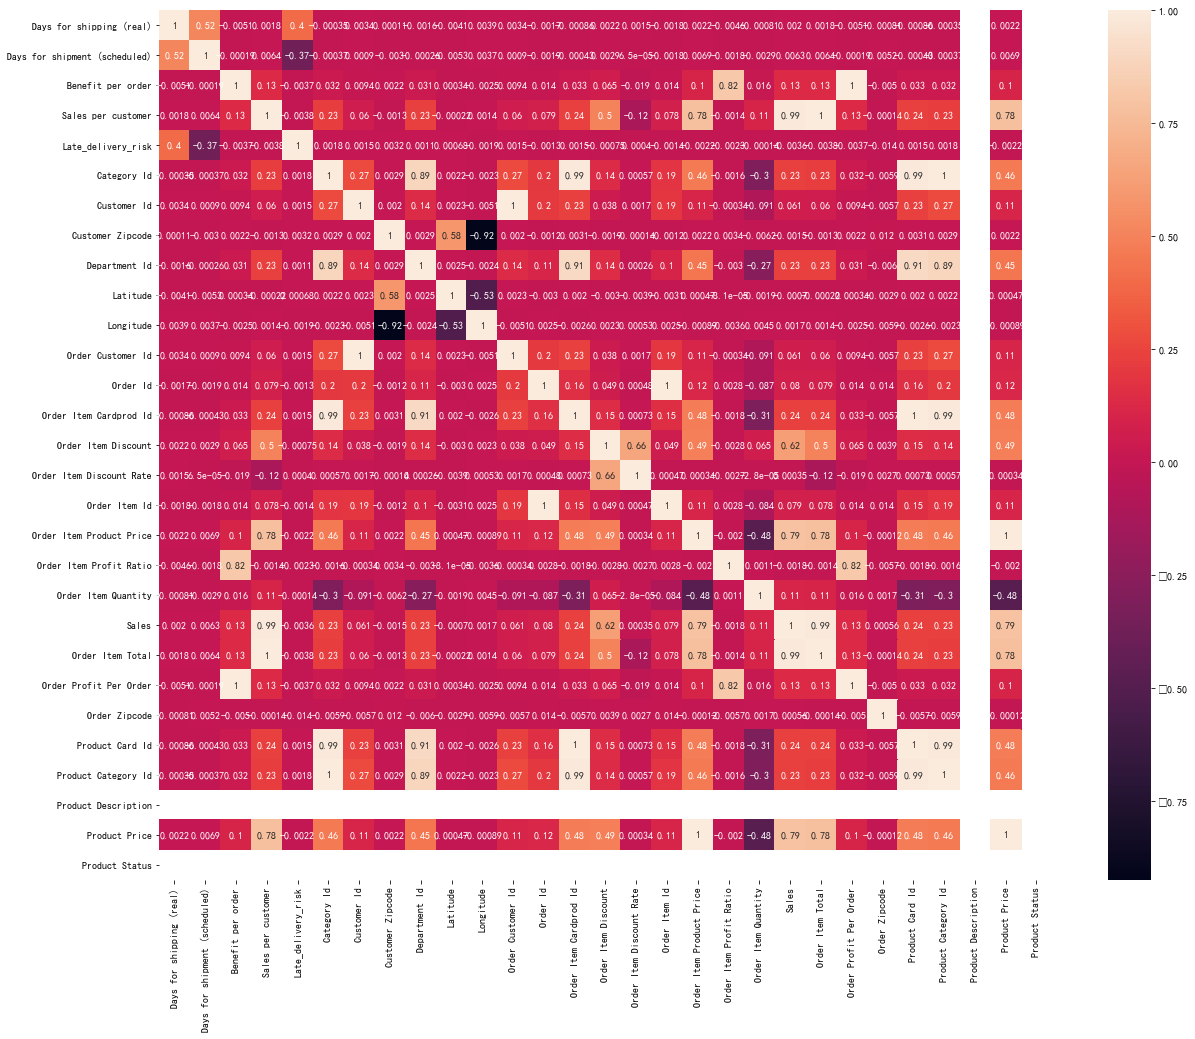

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,16))
data = dataset
sns.heatmap(data.corr(), annot=True)

In [14]:
data[['Customer Lname']]

,Customer Lname
0,Holloway
1,Luna
2,Maldonado
3,Tate
4,Hendricks
...,...
180514,Peterson
180515,Clark
180516,Smith
180517,Smith


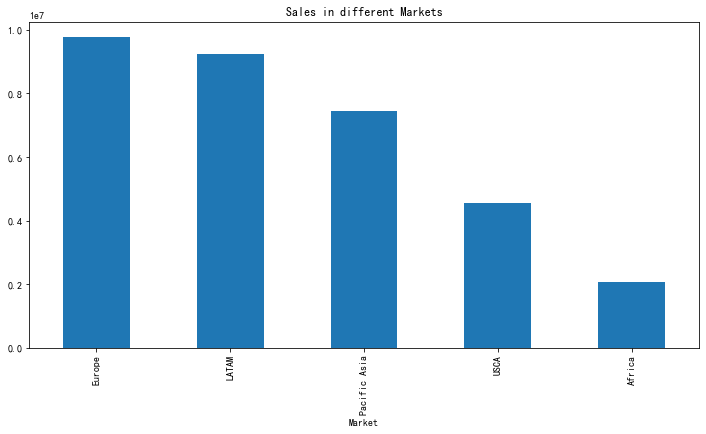

In [19]:
# 按照不同的Market, Order Region
data[['Sales per customer','Market']]
# 基于Market进行聚合
market = data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).\
plot.bar(figsize=(12,6),title='Sales in different Markets')

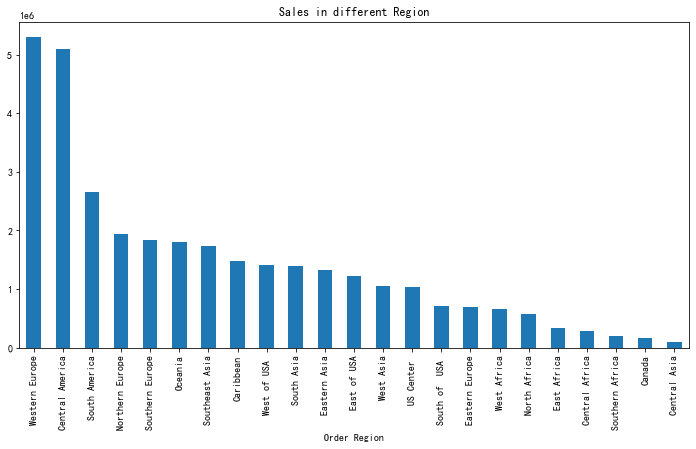

In [20]:
# 基于Region进行聚合
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).\
plot.bar(figsize=(12,6),title='Sales in different Region')

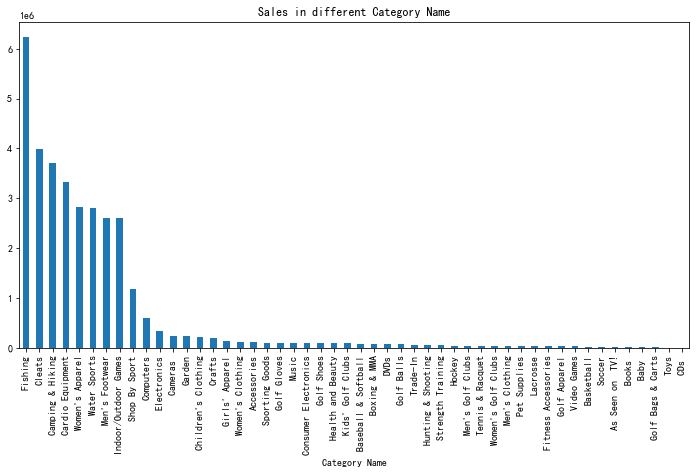

In [21]:
# 按照不同的Category Name
category_name = data.groupby('Category Name')
category_name['Sales per customer'].sum().sort_values(ascending=False).\
plot.bar(figsize=(12,6),title='Sales in different Category Name')

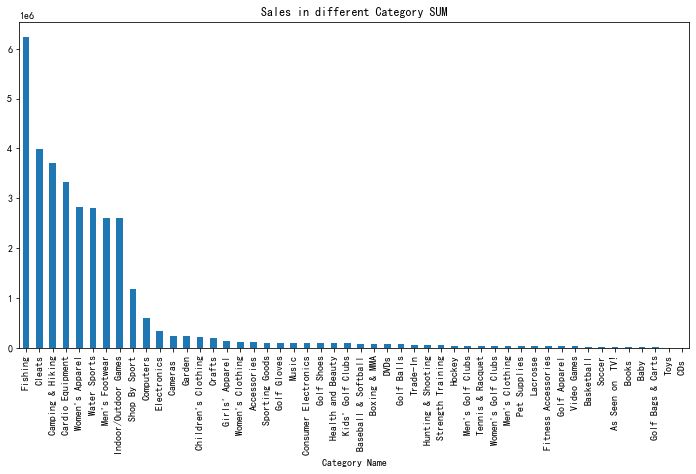

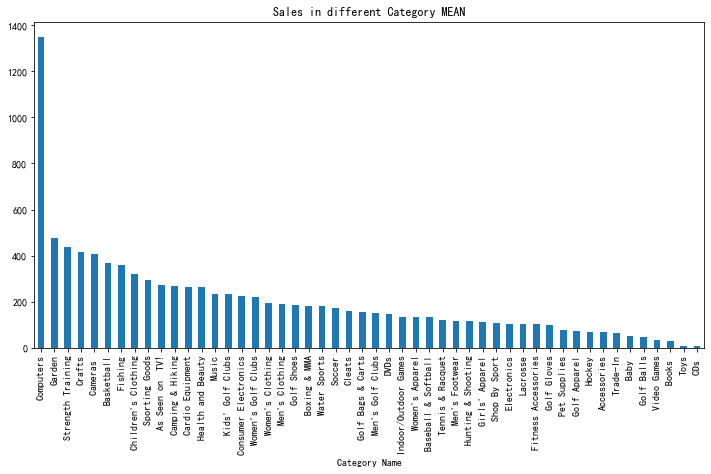

In [24]:
# 按照不同类别的总销售额
cat = data.groupby('Category Name')

cat['Sales per customer'].sum().sort_values(ascending=False).\
plot.bar(figsize=(12,6),title='Sales in different Category SUM')
plt.show()
# 不同类别的平均销售额
cat['Sales per customer'].mean().sort_values(ascending=False).\
plot.bar(figsize=(12,6),title='Sales in different Category MEAN')
plt.show()

In [26]:
# 按照不同的时间维度（年，月，星期，小时）的趋势
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [27]:
# 取order date (DateOrders)字段中的year， month， weekday， hour
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_year,order_month,order_week_day,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,2018,1,2,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,2018,1,5,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,2018,1,5,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,2018,1,5,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,2018,1,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,2016,1,5,3
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class,2016,1,5,1
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class,2016,1,4,21
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class,2016,1,4,20


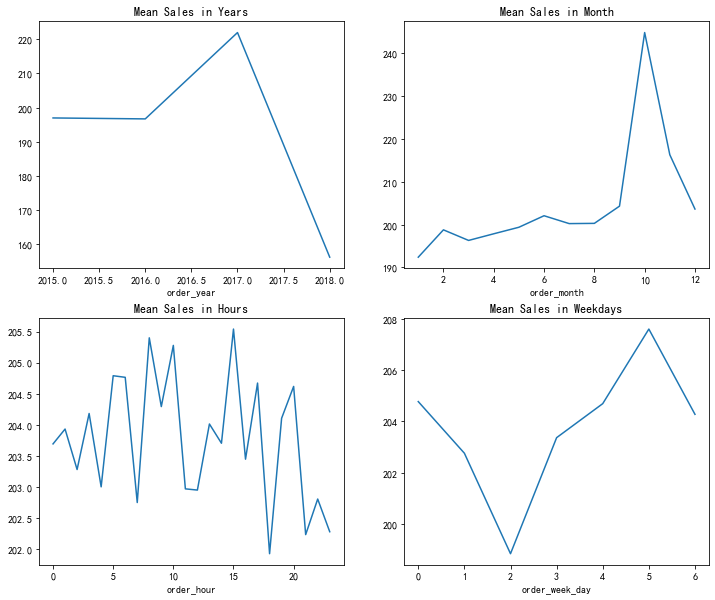

In [29]:
# 对销售额进行探索，按照不同时间尺度order_year、month、weekday、hour
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(title='Mean Sales in Years')
plt.subplot(2,2,2)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(title='Mean Sales in Month')
plt.subplot(2,2,3)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(title='Mean Sales in Hours')
plt.subplot(2,2,4)
df_weekday = data.groupby('order_week_day')
df_weekday['Sales'].mean().plot(title='Mean Sales in Weekdays')

In [ ]:
# Product Price与Sales per customer 相关性如何

## 用户分层 RFM

In [31]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
# 统计最后一笔订单的时间
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [35]:
# 假设当前时间为2018-2-1
import datetime
now = datetime.datetime(2018,2,1)

# 计算每个用户的RFM指标
customer_seg = data.groupby('Customer Id').agg({'order date (DateOrders)'\
:lambda x:(now-x.max()).days,'Order Id':lambda x:len(x),\
                            'Sales':lambda x:x.sum()})
customer_seg

,order date (DateOrders),Order Id,Sales
Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [36]:
customer_seg.rename(columns={'order date (DateOrders)':'R_value','Order Id':'F_value','Sales':'M_value'},inplace=True)
customer_seg

,R_value,F_value,M_value
Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [38]:
# 将RFM数据划分为两个尺度
quantiles = customer_seg.quantile(q=[0.5])
quantiles = quantiles.to_dict()
quantiles

{'R_value': {0.5: 159.0},
 'F_value': {0.5: 7.0},
 'M_value': {0.5: 1499.82503324}}

In [41]:
# R_value越小越好 => R_Score就越大
def R_Score(a,b,c):
    if a < c[b][0.5]:
        return 2
    else:
        return 1

# R_value越大越好 => R_Score就越大
def FM_Score(a,b,c):
    if a >= c[b][0.5]:
        return 2
    else:
        return 1

In [42]:
# 创建R_Score用于将R_value => [1,2]
customer_seg['R_Score'] = customer_seg['R_value'].apply(R_Score,args=('R_value',quantiles))
# 创建F_Score用于将F_value => [1,2]
customer_seg['F_Score'] = customer_seg['F_value'].apply(FM_Score,args=('F_value',quantiles))
# 创建M_Score用于将M_value => [1,2]
customer_seg['M_Score'] = customer_seg['M_value'].apply(FM_Score,args=('M_value',quantiles))
customer_seg

,R_value,F_value,M_value,R_Score,F_Score,M_Score
Customer Id,,,,,,
1,792,1,499.950012,1,1,1
2,136,10,1819.730034,2,2,2
3,229,18,3537.680094,1,2,2
4,380,14,1719.630030,1,2,2
5,457,7,1274.750023,1,2,1
...,...,...,...,...,...,...
20753,0,1,215.820007,2,1,1
20754,0,1,215.820007,2,1,1
20755,0,1,327.750000,2,1,1


In [43]:
# 计算RFM用户分层
def RFM_user(df):
    if df['M_Score'] == 2 and df['F_Score'] == 2 and df['R_Score'] == 2:
        return '重要价值用户'
    if df['M_Score'] == 2 and df['F_Score'] == 1 and df['R_Score'] == 2:
        return '重要发展用户'
    if df['M_Score'] == 2 and df['F_Score'] == 2 and df['R_Score'] == 1:
        return '重要保持用户'
    if df['M_Score'] == 2 and df['F_Score'] == 1 and df['R_Score'] == 1:
        return '重要挽留用户'
    
    if df['M_Score'] == 1 and df['F_Score'] == 2 and df['R_Score'] == 2:
        return '一般价值用户'
    if df['M_Score'] == 1 and df['F_Score'] == 1 and df['R_Score'] == 2:
        return '一般发展用户'
    if df['M_Score'] == 1 and df['F_Score'] == 2 and df['R_Score'] == 1:
        return '一般保持用户'
    if df['M_Score'] == 1 and df['F_Score'] == 1 and df['R_Score'] == 1:
        return '一般挽留用户'

In [44]:
customer_seg['Customer_Type'] = customer_seg.apply(RFM_user,axis=1)
customer_seg

,R_value,F_value,M_value,R_Score,F_Score,M_Score,Customer_Type
Customer Id,,,,,,,
1,792,1,499.950012,1,1,1,一般挽留用户
2,136,10,1819.730034,2,2,2,重要价值用户
3,229,18,3537.680094,1,2,2,重要保持用户
4,380,14,1719.630030,1,2,2,重要保持用户
5,457,7,1274.750023,1,2,1,一般保持用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,2,1,1,一般发展用户
20754,0,1,215.820007,2,1,1,一般发展用户
20755,0,1,327.750000,2,1,1,一般发展用户
